# Load Packages

In [1]:
import numpy as np

from multi_armed_bandit.reward_functions import Rewards
from multi_armed_bandit.algorithms import RobustUCB, ModifiedRobustUCB, DSEE, APE

from matplotlib import pyplot as plt

# Run Experiments

In [2]:
mean_type = 'one_hot'
noise_type = 'pareto'
p = 1.1
scale = 1.0
K = 3
       
samples = 1000*K

if mean_type == 'one_hot':
    gap= 0.1
    means = np.ones(K)
    means[:K-1]-=gap
elif mean_type == 'random':
    means = np.random.uniform(-1, 1, K)
elif mean_type == 'sequence':
    means = np.linspace(0, 1., k)
    
rewards_generator = Rewards(means,p,scale,noise_type)
nu = rewards_generator.nu

algos = [RobustUCB(samples, K, p, nu, c=1.0, estimator_type='TruncatedMean'),
         ModifiedRobustUCB(samples, K, p, nu, c=1.0),
#          APE(samples, K, p, nu, c=1.0, perturbation={'perturbation_type':'Weibull','params':{'k':1.,'scale':1.}}),
#          APE(samples, K, p, nu, c=1.0, perturbation={'perturbation_type':'Frechet','params':{'alpha':1.,'scale':1.}}),
         APE(samples, K, p, nu, c=1.0, perturbation={'perturbation_type':'Pareto','params':{'alpha':1.,'scale':1.}}),
#          APE(samples, K, p, nu, c=1.0, perturbation={'perturbation_type':'Gamma','params':{'alpha':1.,'scale':1.}}),
#          APE(samples, K, p, nu, c=1.0, perturbation={'perturbation_type':'GEV','params':{'zeta':0.0,'scale':1.}}),
         APE(samples, K, p, nu, c=1.0, perturbation={'perturbation_type':'Bounded','params':{}}),
         DSEE(samples, K, p, nu, c=1.0, estimator_type='TruncatedMean')
        ]

regret_list = [[] for _ in range(len(algos))]
agv_regret_list = [[] for _ in range(len(algos))]
action_cnt = [np.zeros(K) for _ in range(len(algos))]

for step in range(samples):
    rewards = rewards_generator.get_observations()

    for alg_idx, algo in enumerate(algos):
        a = algo.choose(step)
        r = rewards[a]
        algo.update(a,r,step)
        regret = np.max(means)- means[a]
        regret_list[alg_idx].append(regret)
        agv_regret_list[alg_idx].append(np.mean(regret_list[alg_idx]))
        action_cnt[alg_idx][a]+=1
        

# Plot Results

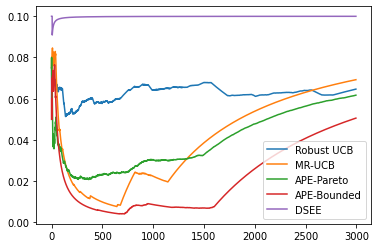

In [3]:
# plt.plot(gap*np.arange(samples))
for alg_idx, algo in enumerate(algos):
    plt.plot(agv_regret_list[alg_idx][K:], label=algo.name)
#     plt.plot(np.cumsum(regret_list[alg_idx][K:]), label=algo.estimator_type)
# plt.ylim([0.0,0.1])
plt.legend()
plt.show()